In [1]:
import pandas as pd
df = pd.read_csv('data_set4.csv')
df.head()

,Message,Type,isDistress
0,making use of them for other and more private...,chatter,0
1,"other men , without the aid of some sort of e...",distress,1
2,infinite inferiority to the choice hidden han...,chatter,0
3,geographical empire encircles an imperial bra...,distress,1
4,Nantucket grimness and shagginess ; and in th...,chatter,0


In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk import WordNetLemmatizer

In [3]:
def tokenizer(x):
 token = RegexpTokenizer(r'\w+')
 return token.tokenize(x)

 
df['toks'] = df['Message'].map(tokenizer)
print(df['toks'].head())

0    [making, use, of, them, for, other, and, more,...
1    [other, men, without, the, aid, of, some, sort...
2    [infinite, inferiority, to, the, choice, hidde...
3    [geographical, empire, encircles, an, imperial...
4    [Nantucket, grimness, and, shagginess, and, in...
Name: toks, dtype: object


In [4]:
print(df['toks'][703])

['to', 'justice', 'demanded', 'it', 'but', 'for', 'the', 'present', 'considering', 'their', 'timely', 'surrender', 'he', 'would', 'let', 'them', 'go', 'with', 'a', 'reprimand', 'which', 'he', 'accordingly', 'administered', 'i', 'SOS', 'Fire', 'position', '2', '5', 'n', 'the', 'vernacular', 'But', 'as', 'for', 'you', 'ye', 'carrion', 'rogues', 'turning', 'to', 'the', 'three', 'men', 'in', 'the', 'rigging', 'for', 'you', 'I', 'mean', 'to', 'mince', 'ye', 'up', 'for', 'the', 'try', 'pots', 'and']


In [5]:
def lemma(x):
 lemma= WordNetLemmatizer()
 return ' '.join([lemma.lemmatize(word) for word in x])

df['lemmatized'] = df['toks'].map(lemma)
print(df['lemmatized'].tail())




1995    up dead upon that shore The Common People imag...
1996    They keep a Whale s Rib of an incredible lengt...
1997    affirm that a Prophet who prophesy d of Mahome...
1998    there CHAPTER 105 Does the Whale s Magnitude D...
1999    that not only are the whale of the present day...
Name: lemmatized, dtype: object


In [7]:
from sklearn.model_selection import train_test_split 

In [8]:
x = df['lemmatized']
y = df['isDistress']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0,shuffle=True)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [10]:
pipe = Pipeline(steps = [('tfid', TfidfVectorizer()), ('munb', MultinomialNB())])

In [11]:
grid = {
 'tfid__max_features' : [1000, 2000, 3000],
 'tfid__stop_words' : ['english', None],
 'tfid__ngram_range' : [(1,1),(1,2),(1,3)],
 'tfid__use_idf' : [True, False],
 'munb__alpha' : [0.1, 0.5, 1]
}

In [12]:
grid_run = GridSearchCV(pipe,grid,cv=5,n_jobs=-1)
grid_run.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfid', TfidfVectorizer()),
                                       ('munb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'munb__alpha': [0.1, 0.5, 1],
                         'tfid__max_features': [1000, 2000, 3000],
                         'tfid__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'tfid__stop_words': ['english', None],
                         'tfid__use_idf': [True, False]})

In [13]:
grid_run.score(X_train, y_train)
print(grid_run.score(X_test, y_test))

0.88


In [14]:
grid_run.best_params_

{'munb__alpha': 1,
 'tfid__max_features': 1000,
 'tfid__ngram_range': (1, 2),
 'tfid__stop_words': 'english',
 'tfid__use_idf': False}

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
predictions = grid_run.predict(x)
df['predictions'] = predictions

In [17]:
c_matrix = confusion_matrix(y, predictions)
c_matrix

array([[946,  54],
       [ 56, 944]], dtype=int64)

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay


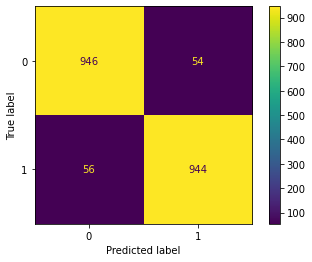

In [19]:

cm = confusion_matrix(y, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [20]:
from sklearn.metrics import classification_report


In [21]:
target_names = ['distress', 'chatter']
print(classification_report(y, predictions, target_names=target_names))

              precision    recall  f1-score   support

    distress       0.94      0.95      0.95      1000
     chatter       0.95      0.94      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.95      0.94      0.94      2000
weighted avg       0.95      0.94      0.94      2000



In [22]:
from sklearn.metrics import precision_recall_fscore_support

In [23]:
precision_recall_fscore_support(y, predictions, average='macro')

(0.94500178000712, 0.945, 0.9449999449999449, None)

In [24]:
results_df = pd.DataFrame(grid_run.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('options')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

,params,rank_test_score,mean_test_score,std_test_score
options,,,,
"1_1000_(1, 2)_english_False","{'munb__alpha': 1, 'tfid__max_features': 1000,...",1,0.887333,0.013064
"1_1000_(1, 3)_english_False","{'munb__alpha': 1, 'tfid__max_features': 1000,...",2,0.886667,0.014907
"0.5_1000_(1, 2)_english_False","{'munb__alpha': 0.5, 'tfid__max_features': 100...",3,0.884667,0.010456
"0.1_1000_(1, 3)_None_False","{'munb__alpha': 0.1, 'tfid__max_features': 100...",4,0.884667,0.011274
"0.5_1000_(1, 3)_english_False","{'munb__alpha': 0.5, 'tfid__max_features': 100...",5,0.882667,0.009286
...,...,...,...,...
"0.1_3000_(1, 3)_english_True","{'munb__alpha': 0.1, 'tfid__max_features': 300...",104,0.724000,0.016111
"0.5_3000_(1, 1)_None_True","{'munb__alpha': 0.5, 'tfid__max_features': 300...",105,0.723333,0.018379
"0.5_3000_(1, 1)_english_True","{'munb__alpha': 0.5, 'tfid__max_features': 300...",106,0.720000,0.020548


In [25]:
import yellowbrick
import matplotlib.pyplot as plt



In [26]:
from yellowbrick.text import FreqDistVisualizer

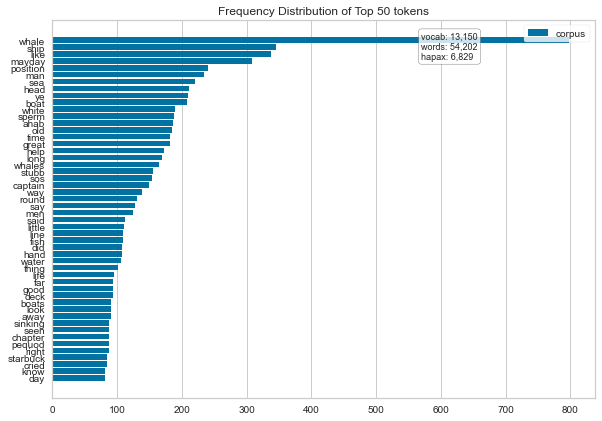

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [27]:
from yellowbrick.text import FreqDistVisualizer

vectorizer = CountVectorizer(stop_words=('english'))
docs       = vectorizer.fit_transform(df['Message'])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='h',size=(700, 500))
visualizer.fit(docs)
visualizer.show()

In [28]:
from yellowbrick.text import TSNEVisualizer

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


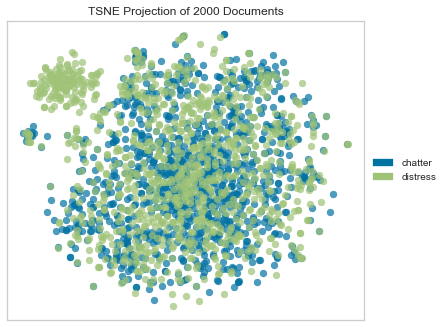

<AxesSubplot:title={'center':'TSNE Projection of 2000 Documents'}>

In [29]:
tfidf = TfidfVectorizer()
X1 = tfidf.fit_transform(df['Message'])
y = df['Type']

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer(labels=None)
tsne.fit(X1, y)
tsne.show()

In [30]:
from yellowbrick.text import PosTagVisualizer

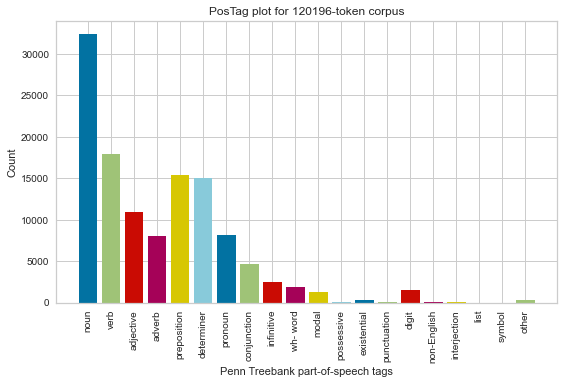

<AxesSubplot:title={'center':'PosTag plot for 120196-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

In [31]:
viz = PosTagVisualizer(parser='nltk')
viz.fit(df['lemmatized'])
viz.show()